# Learning and Decision Making

## Laboratory 1: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the train modeling problem described in the Homework and for which you wrote a Markov chain model:

<img src="trains.png" width="400px">

Recall that your chain should describe the motion of the single train traveling the network, where: 

* Stations $A$ and $B$ are just like regular stops;
* The travel time between any two consecutive stops is exactly 10 minutes. The train stops exactly 2 minutes in each location.
* At the intersection marked with a bold $\times$, the train follows the branch 1-3 with probability 0.5, the branch 4 with probability 0.15, and the branch 5-6 with probability 0.35.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`. If you need additional matrix operations (such as matrix powers or eigenvalues and eigenvectors), you may also import the library `numpy.linalg`.

**Note 2**: Make sure to print the result in the end.

---

In [1]:
import numpy as np

X = ("Station A", "Stop 1", "Stop 2", "Stop 3", "Stop 4", "Stop 5",
     "Stop 6", "Station B")
print("States: {}".format(X))

P = np.zeros((8, 8))
P[0, 1] = 0.5
P[0, 4] = 0.15
P[0, 5] = 0.35
P[1, 2] = 1
P[2, 3] = 1
P[3, 7] = 1
P[4, 7] = 1
P[5, 6] = 1
P[6, 7] = 1
P[7, 0] = 1
print("Transition probability matrix:")
print(P)

States: ('Station A', 'Stop 1', 'Stop 2', 'Stop 3', 'Stop 4', 'Stop 5', 'Stop 6', 'Station B')
Transition probability matrix:
[[0.   0.5  0.   0.   0.15 0.35 0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.  ]]


---

#### Activity 2.

Compute, using the proper transition matrix manipulations, the probability of the following trajectories:

* 4 - $B$ - $A$ - 4
* $A$ - 2 - 3 - $B$ - $A$
* 5 - 6 - $B$ - $A$ - 4

**Note:** Make sure to print the result in the end.

---

In [2]:
def calculateProb(path):
    prob = 1
    for step in range(len(path) - 1):
        prob *= P[path[step], path[step + 1]]
    return prob
    
path1 = [4, 7, 0, 4]
path2 = [0, 2, 3, 7, 0]
path3 = [5, 6, 7, 0, 4]

print("Probability of path '{}': \t{}".format(path1, calculateProb(path1)))
print("Probability of path '{}': \t{}".format(path2, calculateProb(path2)))
print("Probability of path '{}': \t{}".format(path3, calculateProb(path3)))

Probability of path '[4, 7, 0, 4]': 	0.15
Probability of path '[0, 2, 3, 7, 0]': 	0.0
Probability of path '[5, 6, 7, 0, 4]': 	0.15


### 2. Stability

---

#### Activity 3

Compute the stationary distribution for the chain. Confirm, computationally, that it is indeed the stationary distribution.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [3]:
# (@ is the "dot" operator)
# u @ P = u
# <=> (u @ P).T = u.T
# <=> P.T @ u.T = u.T
# => u.T is an eigenvector of P.T with eigenvalue 1
# (The eigenvector v with eigenvalue lambda of a matrix A satisfies A @ v = lambda @ v)

# Gets all the eigenvalues and vectors for P transposed
eigenValues, eigenVectors = np.linalg.eig(P.T)

# Chooses the eigenvector corresponding to the eigenvalue equal to 1, which is the first one,
# and normalizes it
# We want the column and not the line because we're working with the eigenvectors of P transposed
u = eigenVectors.T[0].real / np.sum(eigenVectors[:, 0].real)

# Verifies if u = uP
test = u @ P
if np.allclose(u, test):
    print("Stationary distribution for the chain:\n{}".format(u))

Stationary distribution for the chain:
[0.22988506 0.11494253 0.11494253 0.11494253 0.03448276 0.08045977
 0.08045977 0.22988506]


---

#### Activity 4.

Empirically show that the chain is ergodic.

**Note:** Recall that a chain is ergodic if, given any initial distribution, it converges to the stationary distribution.

---

In [4]:
import random

# Multiplying a random (normalized) initial distribution by the matrix P to the power of 100000000, 
# we conclude the chain is ergodic as the result of the multiplication is similar to the stationary distribution.
# That is done for 1000 randomly generated initial distributions.

def act4():
    for i in range(1000):
        newDist = np.random.rand(8)
        newDist /= np.sum(newDist)
        uInf = newDist @ np.linalg.matrix_power(P, 100000000)
        if not np.allclose(uInf, u):
            print("Different from stationary distribution!")
            return
    print("The chain is ergodic, as the chain converges to the stationary distribution calculated in Activity 3" \
          + " with several different initial distributions.")

act4()

The chain is ergodic, as the chain converges to the stationary distribution calculated in Activity 3 with several different initial distributions.


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [5]:
def checkTrajPossible(traj):
    size = len(traj)
    for step in range(size - 1):
        if not P[traj[step], traj[step + 1]] != 0:
            raise Exception("The generated trajectory is not possible.")
    print("The generated trajectory is possible.")

trajectory = []
stop = 0
for i in range(0, 10000):
    trajectory.append(stop)
    stop = np.random.choice((np.arange(8)), p = P[stop])

print("Trajectory length:", len(trajectory))
print("First 10 stops:", trajectory[0:10])
checkTrajPossible(trajectory)

Trajectory length: 10000
First 10 stops: [0, 5, 6, 7, 0, 5, 6, 7, 0, 1]
The generated trajectory is possible.


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #3.

**Note**: Don't forget to load `matplotlib`.

---

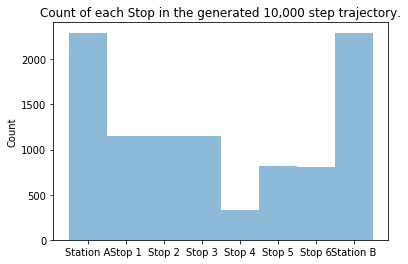

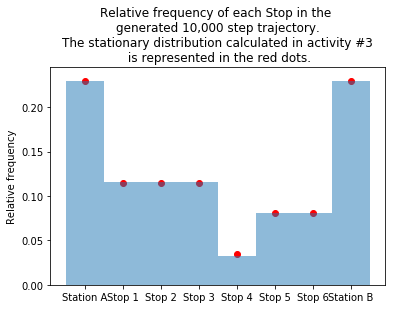

In [7]:
import matplotlib.pyplot as plt

x = np.arange(8)
y = np.bincount(trajectory)

plt.bar(x, y, align='center', width=1, alpha=0.5)
plt.xticks(x, X)
plt.ylabel('Count')
plt.title('Count of each Stop in the generated 10,000 step trajectory.')
plt.show()

plt.figure()
plt.bar(x, y / np.sum(y), align='center', width=1, alpha=0.5)
plt.scatter(x, u, zorder=1, color="red")
plt.xticks(x, X)
plt.ylabel('Relative frequency')
plt.title('Relative frequency of each Stop in the \ngenerated 10,000 step trajectory.\n' \
    + 'The stationary distribution calculated in activity #3\n is represented in the red dots.')
plt.show()

As we can see in the last histogram, the relative frequency of the stops in the generated trajectory aproximates the stationary distribtution represented as the red dots.